## Dataset (MNIST)

In [1]:
from sklearn.datasets import fetch_openml

# Get the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

In [2]:
# Main dataset with 70000 images (resolution 28x28)
# Number of features/dimensions : 28x28x1=784 (grayscale images)
print(mnist.data.shape)

# Labels (numbers from 0 to 9)
print(mnist.target.shape)

(70000, 784)
(70000,)


## Sampling

In [3]:
import numpy as np

# Get 5000 random samples from the dataset
sample = np.random.randint(70000, size=5000)
data = mnist.data.iloc[sample]
target = mnist.target.iloc[sample]

print(sample)

# For best results, use sklearn.utils.resample
#from sklearn.utils import resample
#data = resample(mnist.data, n_samples=5000, random_state=42)

[28412 37351 53372 ... 26137 23365 43759]


## Training and test sets

In [4]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

## Classifier (k-NN)

In [5]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3) # three nearest neighbors
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [6]:
error = 1 - knn.score(xtest, ytest)
print(f"Error: {error}")

Error: 0.08099999999999996


## Find the best value for the hyperparameter k

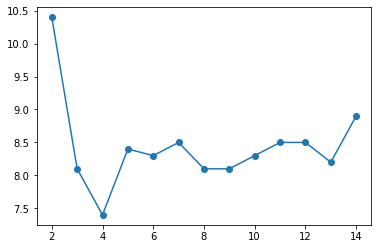

In [7]:
import matplotlib.pyplot as plt

errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

## Predictions

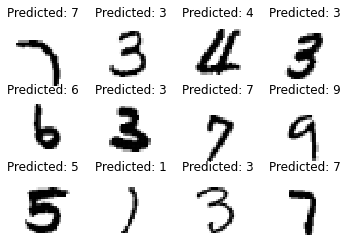

In [13]:
# Best classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain, ytrain)

# Retrieve predictions
predicted = knn.predict(xtest) # shape: (1000, 784)

# Reshape data into images
images = xtest.to_numpy().reshape((-1, 28, 28)) # shape: (1000, 28, 28)

# Get 12 random images
select = np.random.randint(images.shape[0], size=12)

# Display images with the corresponding prediction
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value], cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(predicted[value]) )
    
plt.show()



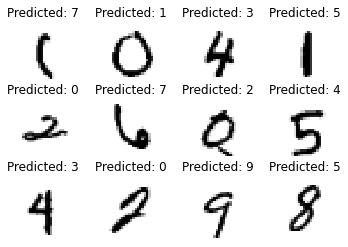

In [14]:
# Bad predictions
misclass = (ytest != predicted) # index
misclass_images = images[misclass, :, :]
misclass_predicted = predicted[misclass]

# Get 12 random images
select = np.random.randint(misclass_images.shape[0], size=12)

# Display images with the corresponding prediction
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value], cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )
    
plt.show()
